In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [125]:
def load_data():
    df = pd.read_csv("smartphone_activity_dataset.csv")
    return df

In [126]:
def load_description():
    attributes = pd.read_csv("attributes_smartphone_activity.csv")
    return attributes

In [127]:
df = load_data()

In [128]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 562 columns):
 #   Column       Dtype  
---  ------       -----  
 0   feature_1    float64
 1   feature_2    float64
 2   feature_3    float64
 3   feature_4    float64
 4   feature_5    float64
 5   feature_6    float64
 6   feature_7    float64
 7   feature_8    float64
 8   feature_9    float64
 9   feature_10   float64
 10  feature_11   float64
 11  feature_12   float64
 12  feature_13   float64
 13  feature_14   float64
 14  feature_15   float64
 15  feature_16   float64
 16  feature_17   float64
 17  feature_18   float64
 18  feature_19   float64
 19  feature_20   float64
 20  feature_21   float64
 21  feature_22   float64
 22  feature_23   float64
 23  feature_24   float64
 24  feature_25   float64
 25  feature_26   float64
 26  feature_27   float64
 27  feature_28   float64
 28  feature_29   float64
 29  feature_30   float64
 30  feature_31   float64
 31  feature_32   float64
 32  f

In [129]:
def split_data(df):
    X_train, X_val, y_train, y_val = train_test_split(
    df[df.columns.values[:-1]], # X
    df[df.columns.values[-1]], # y
    test_size=0.33, random_state=42)
    X_val, X_test = train_test_split(X_val, test_size = 0.3, random_state = 42)
    y_val, y_test =  train_test_split(y_val, test_size = 0.3, random_state = 42)
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [130]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [131]:
print("X_train:",len(X_train))
print("y_train:",len(y_train))
print("X_val:",len(X_val))
print("y_val:",len(y_val))
print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 6900
y_train: 6900
X_val: 2379
y_val: 2379
X_test: 1020
y_test: 1020


In [132]:
def remove_correlated(df):
    corr = df.corr()

    # Create a mask for values above 90% 
    # But also below 100% since it variables correlated with the same one
    mask = (df.corr() > 0.9) & (df.corr() < 1.0)
    high_corr = corr[mask]

    # Create a new column mask using any() and ~
    col_to_filter_out = ~high_corr[mask].any()

    # Apply new mask
    df_clean = df[high_corr.columns[col_to_filter_out]]

    # Visualize cleaned dataset
    return df_clean

In [133]:
X_train = remove_correlated(X_train)

In [134]:
X_train.shape

(6900, 157)

In [135]:
X_train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_25', 'feature_27',
       'feature_28', 'feature_29', 'feature_31', 'feature_32', 'feature_33',
       ...
       'feature_546', 'feature_551', 'feature_552', 'feature_555',
       'feature_556', 'feature_557', 'feature_558', 'feature_559',
       'feature_560', 'feature_561'],
      dtype='object', length=157)

In [136]:
def check_what_influence(X,y):
    X_copy = X.copy()
    X_copy["activity"] = y
    corr_matrix = X_copy.corr().abs()
    corr_matrix = corr_matrix["activity"]
    return corr_matrix.nlargest(20).iloc[1:]

In [137]:
x = check_what_influence(X_train,y_train)
x

feature_135    0.748339
feature_205    0.737969
feature_218    0.737969
feature_173    0.725152
feature_231    0.719412
feature_25     0.709566
feature_257    0.705955
feature_134    0.697288
feature_155    0.678181
feature_175    0.676065
feature_133    0.666252
feature_244    0.648764
feature_174    0.629246
feature_145    0.621192
feature_559    0.610403
feature_520    0.602366
feature_560    0.601877
feature_375    0.567529
feature_546    0.559990
Name: activity, dtype: float64

In [138]:
featuresA = [str(col) for col in x.index]
featuresA

['feature_135',
 'feature_205',
 'feature_218',
 'feature_173',
 'feature_231',
 'feature_25',
 'feature_257',
 'feature_134',
 'feature_155',
 'feature_175',
 'feature_133',
 'feature_244',
 'feature_174',
 'feature_145',
 'feature_559',
 'feature_520',
 'feature_560',
 'feature_375',
 'feature_546']

In [139]:
def choose_the_best(df,features):
    df = df[features]
    return df

In [140]:
X_train = choose_the_best(X_train,featuresA)

In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6900 entries, 1469 to 7270
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_135  6900 non-null   float64
 1   feature_205  6900 non-null   float64
 2   feature_218  6900 non-null   float64
 3   feature_173  6900 non-null   float64
 4   feature_231  6900 non-null   float64
 5   feature_25   6900 non-null   float64
 6   feature_257  6900 non-null   float64
 7   feature_134  6900 non-null   float64
 8   feature_155  6900 non-null   float64
 9   feature_175  6900 non-null   float64
 10  feature_133  6900 non-null   float64
 11  feature_244  6900 non-null   float64
 12  feature_174  6900 non-null   float64
 13  feature_145  6900 non-null   float64
 14  feature_559  6900 non-null   float64
 15  feature_520  6900 non-null   float64
 16  feature_560  6900 non-null   float64
 17  feature_375  6900 non-null   float64
 18  feature_546  6900 non-null   float64
dtypes: 

In [142]:
X_train.describe()

,feature_135,feature_205,feature_218,feature_173,feature_231,feature_25,feature_257,feature_134,feature_155,feature_175,feature_133,feature_244,feature_174,feature_145,feature_559,feature_520,feature_560,feature_375,feature_546
count,6900.000000,6900.00000,6900.00000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.00000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000
mean,0.556824,-0.83676,-0.83676,0.759128,-0.787188,-0.153755,-0.801504,0.734295,0.069511,0.797473,0.630313,-0.727018,0.831204,-0.05950,-0.499346,-0.802860,0.065826,-0.124227,-0.870121
std,0.309423,0.19056,0.19056,0.280784,0.254002,0.365151,0.248046,0.210152,0.282104,0.249741,0.252451,0.313886,0.225189,0.45382,0.506467,0.268188,0.305078,0.271240,0.192095
min,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,-0.999000,-0.520000,-1.000000,-1.000000,-0.916000,-1.000000,-0.994000,-1.00000,-1.000000,-1.000000,-1.000000,-0.963000,-1.000000
25%,0.322000,-0.99225,-0.99225,0.565000,-0.983000,-0.489000,-0.990000,0.605000,-0.164000,0.643000,0.460000,-0.988000,0.721000,-0.45400,-0.816000,-0.987000,0.007200,-0.332000,-0.993000
50%,0.732500,-0.96450,-0.96450,0.930000,-0.961000,-0.127000,-0.970000,0.850000,0.067000,0.951000,0.766000,-0.871500,0.956000,0.03520,-0.715000,-0.959000,0.185000,-0.104000,-0.972000
75%,0.822000,-0.69500,-0.69500,0.990000,-0.613000,0.169000,-0.641000,0.906000,0.293250,0.994000,0.838000,-0.522000,0.994000,0.30700,-0.524000,-0.675000,0.252000,0.088725,-0.807000
max,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.804000,1.000000,0.945000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.831000,0.941000


In [143]:
print(len(X_train))
print(len(y_train))

6900
6900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACBB844820>,
      dtype=object)

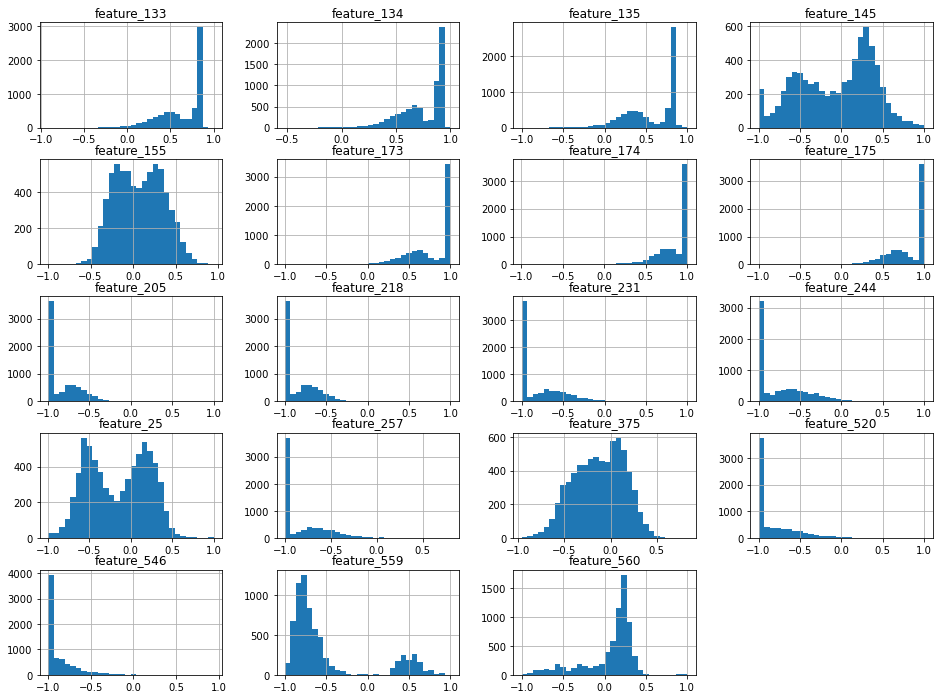

In [144]:
X_train.hist(bins=30, figsize=(16, 12))

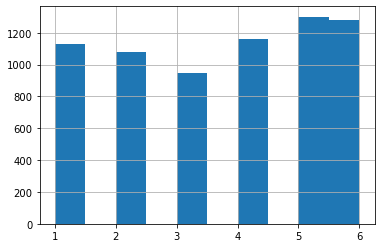

In [145]:
y_train.hist()

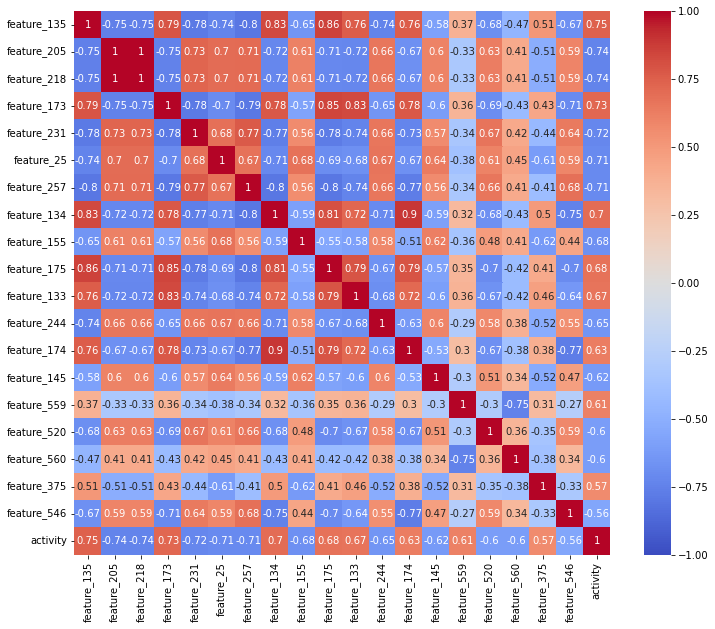

In [146]:
#corr map on shorter dataset
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [147]:
#we can delete feature_205 or feature_218 and feature_174 or feature_134 cuz they are highly correlated
X_train = X_train.drop(['feature_218', "feature_174"], axis=1)

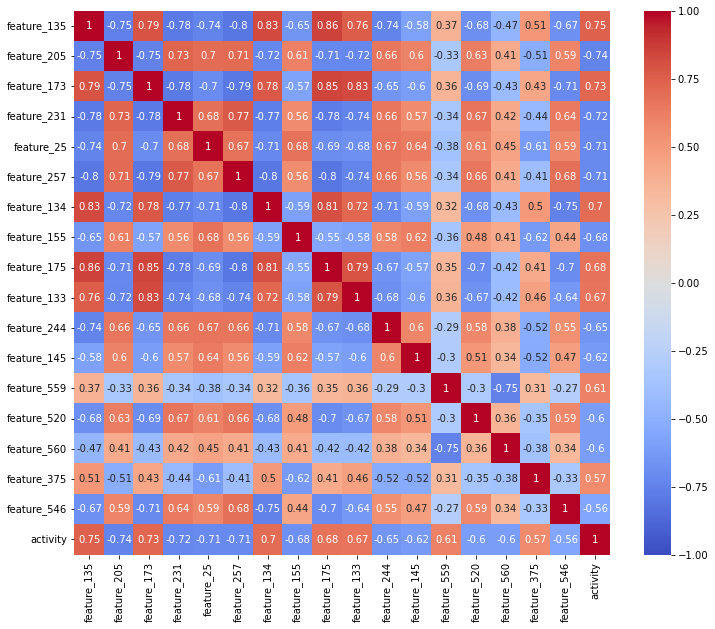

In [148]:
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [149]:
#Zastanawiam sie ktore wartosci moge jeszcze wyrzucic, z jednej strony wybierajac najbardziej skorelowane z predykatorem narazam 
#sie na przypadek wyboru cech ktore sa ze soba dosc mocno skorelowane wiec bezposrednio nie wniosa tyle informacji co cechy 
#ktore bylyby ze soba mniej skorelowane, z drugiej strony wybierajac te ktore nie sa ze soba mocno skorelowane moze byc przypadek 
#ze wybiore zmienne ktore koniec koncow maja mniejsza korelacje z predykatem niz te ktore wyrzucilem masz jakis pomysl?

In [153]:
(df[df.columns] == 0).sum(axis = 0)

feature_135    0
feature_205    0
feature_173    0
feature_231    0
feature_25     0
feature_257    0
feature_134    0
feature_155    0
feature_175    0
feature_133    0
feature_244    0
feature_145    0
feature_559    0
feature_520    0
feature_560    0
feature_375    0
feature_546    0
activity       0
dtype: int64

In [154]:
df.nunique() / len(df) * 100

feature_135    16.666667
feature_205     9.753623
feature_173    13.173913
feature_231    12.869565
feature_25     27.681159
feature_257    12.637681
feature_134    11.086957
feature_155    29.768116
feature_175    12.014493
feature_133    13.289855
feature_244    16.072464
feature_145    28.217391
feature_559    16.405797
feature_520    14.579710
feature_560    23.014493
feature_375    32.333333
feature_546    11.144928
activity        0.086957
dtype: float64